In [1]:
import math
import pandas as pd
wb = pd.read_csv('/Users/anna/Documents/GitHub/Lexical-Complexity-of-Speech/Get Utterances/wordbank_stanford.csv')
wb.rename(columns={'definition': 'gloss'}, inplace=True)
df1_old = pd.read_csv('/Users/anna/Documents/GitHub/Lexical-Complexity-of-Speech/Get Utterances/df1_vocab.csv')
df2_old = pd.read_csv('/Users/anna/Documents/GitHub/Lexical-Complexity-of-Speech/Get Utterances/df2_vocab.csv')

In [92]:
df1 = df1_old.drop(['Unnamed: 0', 'index', 'id', 'speaker_id', 'utterance_order',
       'transcript_id', 'corpus_id', 'num_tokens', 'stem',
       'part_of_speech', 'speaker_code', 'speaker_name',
       'target_child_id', 'target_child_name',
       'target_child_sex', 'type', 'media_end', 'media_start', 'media_unit',
       'collection_id', 'collection_name', 'num_morphemes', 'language',
       'corpus_name'], axis = 1)
df2 = df2_old.drop(['Unnamed: 0', 'index', 'id', 'speaker_id', 'utterance_order',
       'transcript_id', 'corpus_id', 'num_tokens', 'stem',
       'part_of_speech', 'speaker_code', 'speaker_name',
       'target_child_id', 'target_child_name',
       'target_child_sex', 'type', 'media_end', 'media_start', 'media_unit',
       'collection_id', 'collection_name', 'num_morphemes', 'language',
       'corpus_name'], axis = 1)

In [128]:
df_final = pd.DataFrame()
for age in range(16, 31):
    for n in ["Adult-directed", "Child-directed"]:
        if n == "Adult-directed":
                df_age = df1.loc[(df1['target_child_age']<age+1) & (df1['target_child_age']>age)]
        else:
               df_age = df2.loc[(df2['target_child_age']<age+1) & (df2['target_child_age']>age)]
        if len(df_age)>0:
            for i in range(100):
                df = df_age.sample(1000, replace = True)
                merged = pd.merge(wb, df, how='inner', on=['gloss'])
                merged = merged[(merged["speaker_role"]!= 'target_child') & (merged["speaker_role"]!= 'child')]
                p = merged.shape[0]/1000
                complexity = -math.log(p)
                l = pd.Series([age, complexity, n])
                df_final = df_final.append(l, ignore_index=True)
        else:
            string = 'Adult-directed dataframe has no target-child around age' + str(age)
            print(string)


Adult-directed dataframe has no target-child around age16
Adult-directed dataframe has no target-child around age19
Adult-directed dataframe has no target-child around age20


In [125]:
df_final.columns = ['Age', 'Complexity', 'Type']
df_final.to_csv('df_Complexity.csv')

In [4]:
df_complexity = pd.read_csv('df_Complexity.csv')
df_complexity.head()

,Unnamed: 0,Age,Complexity,Type
0,0,16.0,-0.0,Child-directed
1,1,16.0,-0.0,Child-directed
2,2,16.0,-0.0,Child-directed
3,3,16.0,-0.0,Child-directed
4,4,16.0,-0.0,Child-directed


In [9]:
dfplot = df_complexity[['Age','Complexity']]

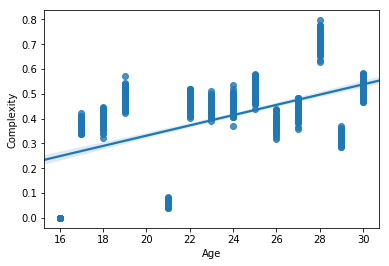

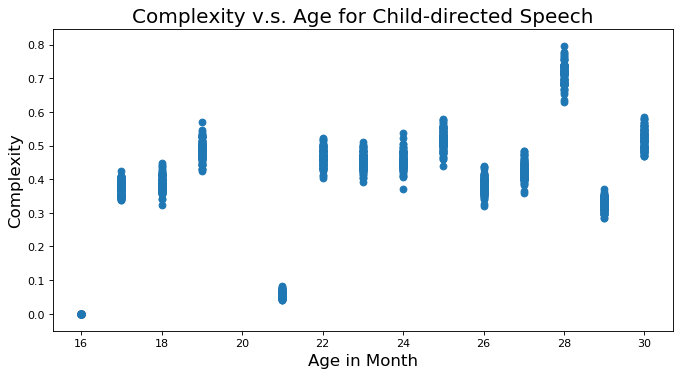

Slope: 0.0206872793268
Intercept: -0.0824329420314


In [86]:
#p = dfplot.plot.bar(stacked=True, figsize=(60, 40), fontsize=50)
#p.set_ylabel('Complexity', fontsize=100)
#p.set_xlabel('Child Age in Month', fontsize=100)
#p.show()
import matplotlib.pyplot as plt
x = df_complexity[df_complexity['Type'] == 'Child-directed']['Age']
y = df_complexity[df_complexity['Type'] == 'Child-directed']['Complexity']
plt.figure(figsize=(10, 5), dpi=80)
plt.scatter(x,y)
plt.title('Complexity v.s. Age for Child-directed Speech', fontsize = 18)
plt.xlabel('Age in Month', fontsize = 15)
plt.ylabel('Complexity', fontsize = 15)
plt.show()

import numpy as np
par = np.polyfit(x, y, 1, full=True)
slope=str(par[0][0])
intercept=str(par[0][1])

import seaborn as sns
sns.regplot(x, y)

print('Slope: ' + slope)
print('Intercept: '+ intercept)

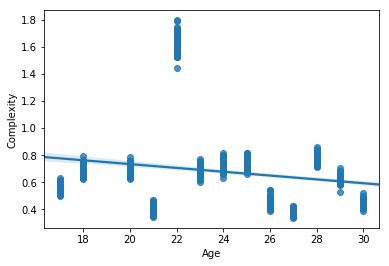

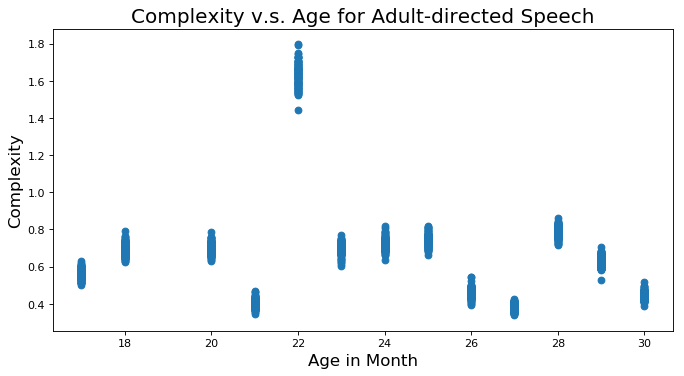

Slope: -0.0141163268241
Intercept: 1.01705554564


In [89]:
x2 = df_complexity[df_complexity['Type'] == 'Adult-directed']['Age']
y2 = df_complexity[df_complexity['Type'] == 'Adult-directed']['Complexity']
plt.figure(figsize=(10, 5), dpi=80)
plt.scatter(x2,y2)
plt.title('Complexity v.s. Age for Adult-directed Speech', fontsize = 18)
plt.xlabel('Age in Month', fontsize = 15)
plt.ylabel('Complexity', fontsize = 15)
plt.show()

par = np.polyfit(x2, y2, 1, full=True)
slope=str(par[0][0])
intercept=str(par[0][1])

sns.regplot(x2, y2)
print('Slope: ' + slope)
print('Intercept: '+ intercept)